In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("../data/raw/CC GENERAL.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# Drop Unrelated columns

In [34]:
df.drop(columns=["CUST_ID"], inplace=True)

# Handling Missing Values:

In [35]:
#CREDIT_LIMIT: only one row, so drop it.    
df=df[~df["CREDIT_LIMIT"].isna()]

In [36]:
#MINIMUM_PAYMENTS: relation between PAYMENTS and MINIMUM_PAYMENTS is important in claster analysis, so prefer to drop them.
df=df[~df["MINIMUM_PAYMENTS"].isna()]

In [37]:
df.isna().sum().sum()

np.int64(0)

# Removing Duplicates:

In [38]:
#no duplicates to drop.

# Removing Invalid or Implausible Data:


PURCHASES: PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES

In [39]:
#all data is valid
df[(df["PURCHASES"]-df["ONEOFF_PURCHASES"]-df["INSTALLMENTS_PURCHASES"]) > 0.01] #error tolerance.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


there shouldn't be an inconsistency between PURCHASES_TRX (number of purchase transactions) and PURCHASES (total value of purchases).

In [40]:
print(len(df[((df['PURCHASES_TRX']==0) & (df['PURCHASES']!=0)) | ((df['PURCHASES_TRX']!=0) & (df['PURCHASES']==0))]))
df[((df['PURCHASES_TRX']==0) & (df['PURCHASES']!=0)) | ((df['PURCHASES_TRX']!=0) & (df['PURCHASES']==0))]

6


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1458,4.382924,0.272727,130.24,0.00,152.24,0.000000,0.083333,0.000000,0.083333,0.000000,0,0,14000.0,28988.973880,1092.184812,0.500000,12
3590,1.869435,0.454545,0.24,0.24,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,0,3000.0,150.381107,53.294711,0.000000,12
4497,72.425884,1.000000,655.68,0.00,655.68,0.000000,1.000000,0.000000,1.000000,0.000000,0,0,1000.0,718.537117,162.732686,0.333333,12
4682,1089.795044,1.000000,0.00,0.00,20.00,38.249993,0.000000,0.000000,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.000000,12
5727,1084.649802,1.000000,0.00,0.00,0.00,708.865975,0.000000,0.000000,0.000000,0.181818,10,1,1500.0,973.731202,252.062796,0.000000,11
8327,17.699123,0.454545,0.00,0.00,0.00,29.421611,0.000000,0.000000,0.000000,0.083333,1,2,2000.0,178.288304,82.738431,0.333333,12


In [41]:
df=df[~(((df['PURCHASES_TRX']==0) & (df['PURCHASES']!=0)) | ((df['PURCHASES_TRX']!=0) & (df['PURCHASES']==0)))]

# 

there shouldn't be an inconsistency between CASH_ADVANCE_TRX and CASH_ADVANCE.

In [42]:
#all rows are valid.
print(len(df[((df['CASH_ADVANCE_TRX']==0) & (df['CASH_ADVANCE']!=0)) | ((df['CASH_ADVANCE_TRX']!=0) & (df['CASH_ADVANCE']==0))]))
df[((df['CASH_ADVANCE_TRX']==0) & (df['CASH_ADVANCE']!=0)) | ((df['CASH_ADVANCE_TRX']!=0) & (df['CASH_ADVANCE']==0))]

0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


there shouldn't be an inconsistency between PURCHASES and PURCHASES_FREQUENCY during last 6 months.

In [43]:
df[((df['PURCHASES']==0) & (df['PURCHASES_FREQUENCY']!=0)) | ((df['PURCHASES_FREQUENCY']!=0) & (df['PURCHASES']==0))]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2221,391.385478,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0,0,4000.0,192.787345,227.924469,0.0,12


In [44]:
df=df[~(((df['PURCHASES']==0) & (df['PURCHASES_FREQUENCY']!=0)) | ((df['PURCHASES_FREQUENCY']!=0) & (df['PURCHASES']==0)))]

there shouldn't be an inconsistency between ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY during last 6 months.

In [45]:
#all rows are valid.
df[((df['ONEOFF_PURCHASES_FREQUENCY']==0) & (df['ONEOFF_PURCHASES']!=0)) | ((df['ONEOFF_PURCHASES']!=0) & (df['ONEOFF_PURCHASES_FREQUENCY']==0))]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


there shouldn't be an inconsistency between INSTALLMENTS_PURCHASES and INSTALLMENTS_PURCHASES during last 6 months.

In [46]:
#all rows are valid.
df[((df['PURCHASES_INSTALLMENTS_FREQUENCY']==0) & (df['INSTALLMENTS_PURCHASES']!=0)) | ((df['INSTALLMENTS_PURCHASES']!=0) & (df['PURCHASES_INSTALLMENTS_FREQUENCY']==0))]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


there shouldn't be valueswhere normalized frequency> 1.0.

In [47]:
df[df['CASH_ADVANCE_FREQUENCY'] > 1.0]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [48]:
df=df[~(df['CASH_ADVANCE_FREQUENCY'] > 1.0)]

In [49]:
len(df)

8621

# Outlier Treatment:

In [50]:
thresholds = {
    'BALANCE': (0, 15000),
    'PURCHASES': (0, 30000),
    'ONEOFF_PURCHASES': (0, 30000),  
    'INSTALLMENTS_PURCHASES': (0, 20000),
    'CASH_ADVANCE': (0, 30000), 
    'CASH_ADVANCE_TRX': (0, 80),  
    'PURCHASES_TRX': (0, 300),  
    'PAYMENTS': (0, 40000),  
    'MINIMUM_PAYMENTS': (0, 50000),  
}
df_filtered = df.copy()

for column, (min_value, max_value) in thresholds.items():
    if column in df_filtered.columns:
        df_filtered = df_filtered[(df_filtered[column] >= min_value) & (df_filtered[column] <= max_value)]
len(df_filtered)


8589

In [51]:
thresholds = {
    'BALANCE': (0, 15000),
    'PURCHASES': (0, 30000),
    'ONEOFF_PURCHASES': (0, 30000),  
    'INSTALLMENTS_PURCHASES': (0, 20000),
    'CASH_ADVANCE': (0, 30000), 
    'CASH_ADVANCE_TRX': (0, 80),  
    'PURCHASES_TRX': (0, 300),  
    'PAYMENTS': (0, 40000),  
    'MINIMUM_PAYMENTS': (0, 50000),  
}
df_filtered = df.copy()

for column, (min_value, max_value) in thresholds.items():
    if column in df_filtered.columns:
        df_filtered = df_filtered[(df_filtered[column] >= min_value) & (df_filtered[column] <= max_value)]
len(df_filtered)


8589

# Drop Related Columns

In [52]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
df.drop(columns=["ONEOFF_PURCHASES"], inplace=True) #correlation with PURCHASES
df.drop(columns=["INSTALLMENTS_PURCHASES"], inplace=True) #correlation with PURCHASES
df.drop(columns=["ONEOFF_PURCHASES_FREQUENCY"], inplace=True) #as ONEOFF_PURCHASES dropped
df.drop(columns=["PURCHASES_INSTALLMENTS_FREQUENCY"], inplace=True) #as INSTALLMENTS_PURCHASES dropped
df.drop(columns=["PURCHASES_TRX"], inplace=True)#correlation with PURCHASES_FREQUENCY and carry same meaning
df.drop(columns=["CASH_ADVANCE_TRX"], inplace=True)#correlation with CASH_ADVANCE_FREQUENCY and carry same meaning
df.drop(columns=["TENURE"], inplace=True)# low variance column

In [73]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

# Feature Engineering and Transformation:

In [ ]:
from sklearn.preprocessing import QuantileTransformer

cols_to_transform = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

qt = QuantileTransformer(n_quantiles=2000, output_distribution='normal', random_state=42)
df_transformed = df.copy()
df_transformed[cols_to_transform] = qt.fit_transform(df[cols_to_transform])


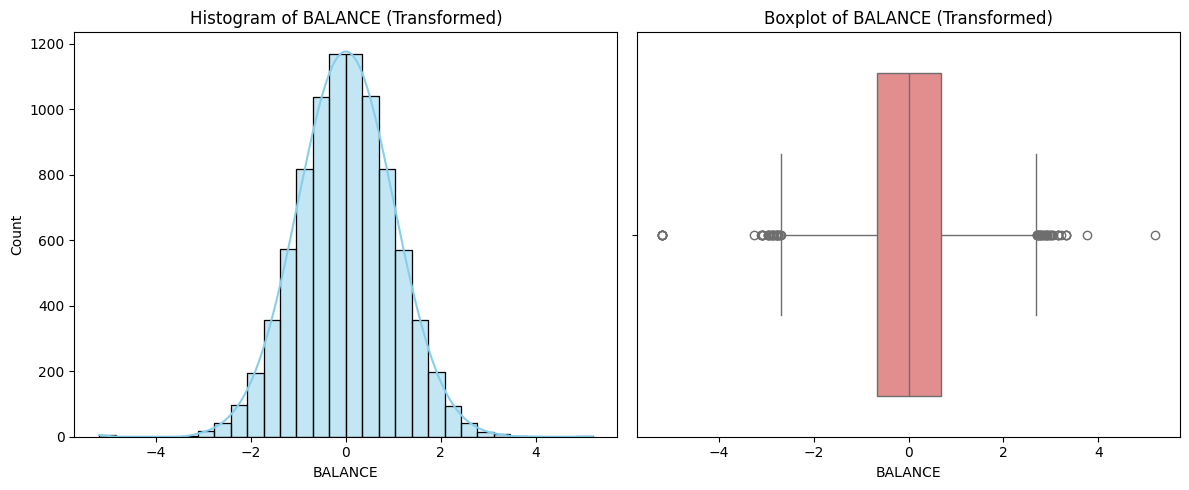

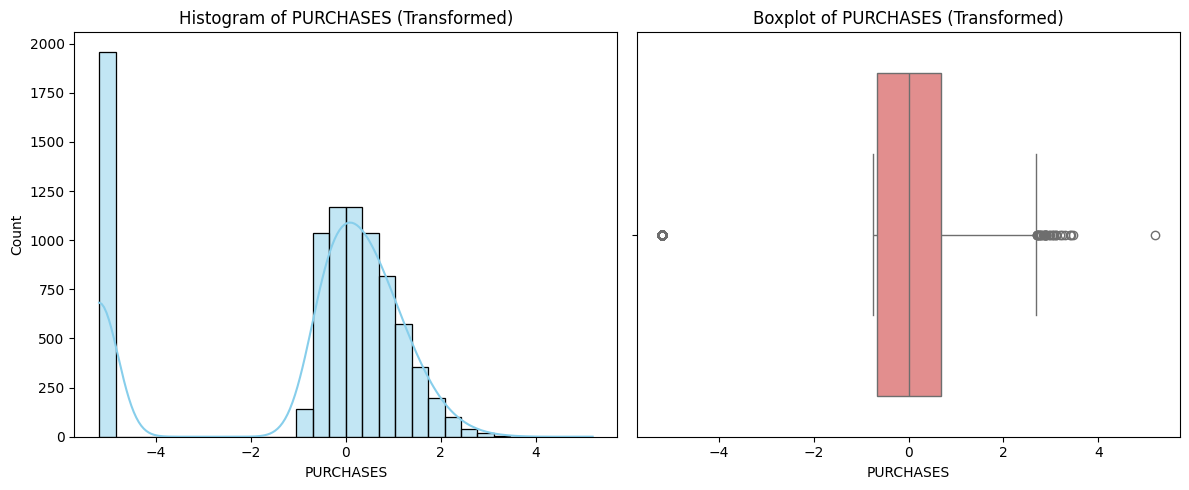

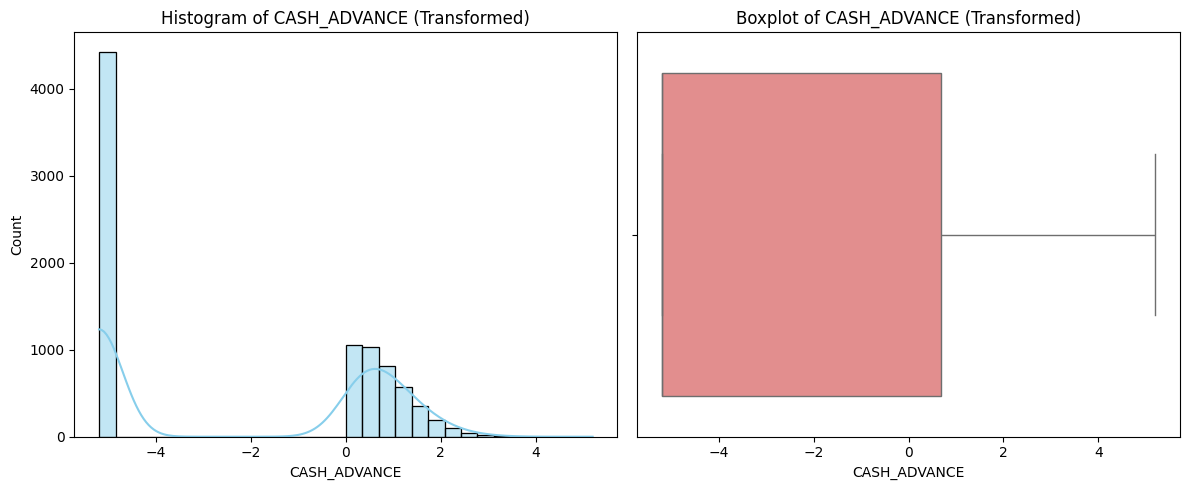

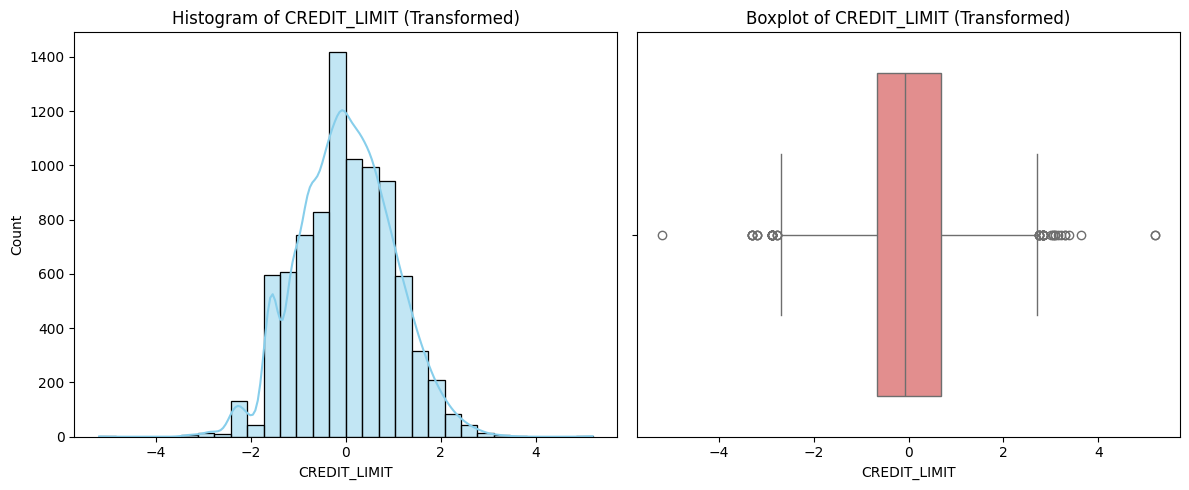

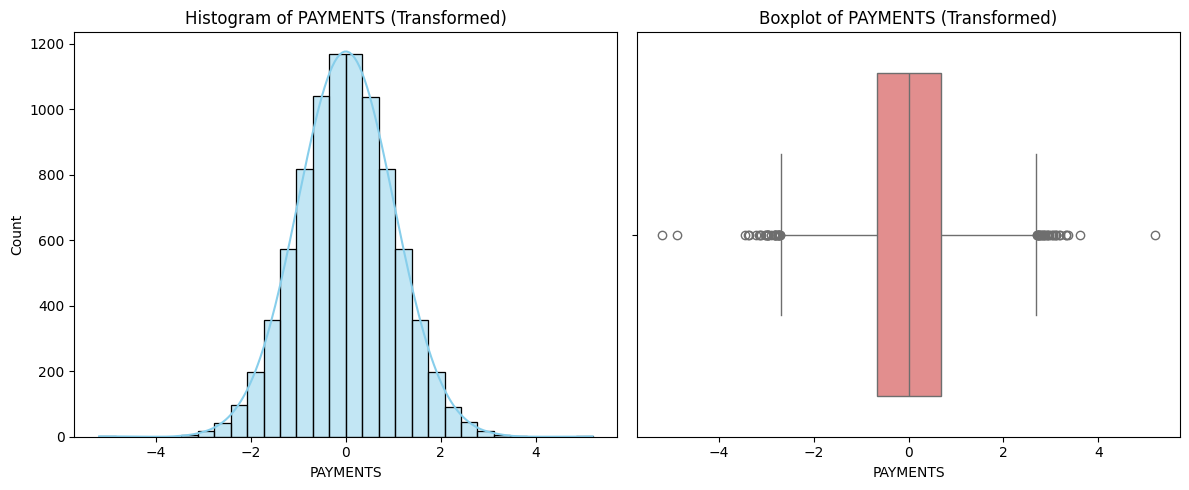

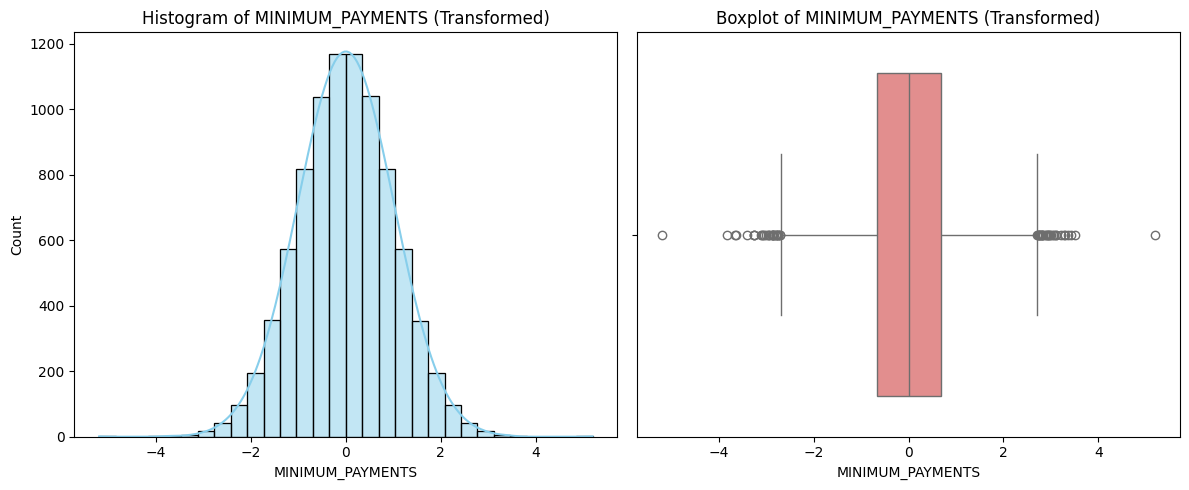

In [ ]:
cols_to_plot = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

for col in cols_to_plot:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_transformed[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col} (Transformed)')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_transformed[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (Transformed)')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


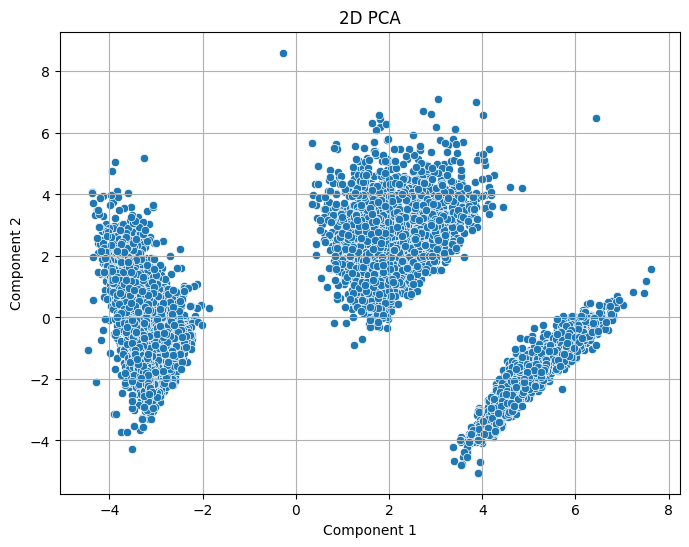

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_transformed)

pca_df_2d = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df_2d)
plt.title('2D PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


In [80]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_transformed)
tsne_df_2d = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df_2d['Cluster'] = df['Cluster']  # Add cluster labels for coloring

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df_2d, palette='tab10', s=60, alpha=0.8)
plt.title('2D t-SNE Colored by Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


KeyError: 'Cluster'

In [75]:
df_transformed.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000
mean,-0.001103,0.895083,-0.880158,-2.270988,0.496553,0.136696,0.002992,-0.000171,-0.000169,0.159445
std,1.006500,0.207626,2.433276,3.037602,0.401261,0.199330,0.995468,1.002468,1.002371,0.296434
min,-5.199338,0.000000,-5.199338,-5.199338,0.000000,0.000000,-5.199338,-5.199338,-5.199338,0.000000
25%,-0.674489,0.909091,-0.674481,-5.199338,0.083333,0.000000,-0.668598,-0.674156,-0.674612,0.000000
50%,0.000312,1.000000,0.000431,-5.199338,0.500000,0.000000,-0.084113,-0.000059,0.000067,0.000000
75%,0.674139,1.000000,0.674208,0.674446,0.916667,0.250000,0.693902,0.674239,0.675113,0.166667
max,5.199338,1.000000,5.199338,5.199338,1.000000,1.000000,5.199338,5.199338,5.199338,1.000000


# Scaling and Normalization:

In [ ]:
#QuantileTransformer already standerdized data.
#frequency cols are min max normalized.

# Saving Preprocessed data:

In [79]:
df_transformed.to_csv('../data/processed/df_processed.csv', index=False)